### Task 3

In [1]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# This will automatically reload src/dtree.py every time you make changes and save the file
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
df_task1_train = pd.read_csv('train.csv')

df_task1_train_original = pd.read_csv('train.csv')

df_task1_train.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,transmission,curb_weight,power,fuel_type,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
0,1030324,BMW 3 Series 320i Gran Turismo M-Sport,bmw,320i,1 owner! 320i gt m-sports model! big brake kit...,2013.0,NaN,09-dec-2013,luxury sedan,"parf car, premium ad car, low mileage car",auto,1560.0,135.0,NaN,1997.0,1.0,17700.0,77100.0,1210.0,47514.0,73000.0,45330.0,50462.0,NaN,NaN,uncategorized,"5 doors gt, powerful and fuel efficient 2.0l t...","bmw i-drive, navigation, bluetooth/aux/usb inp...",NaN,71300.0
1,1021510,Toyota Hiace 3.0M,NaN,hiace,high loan available! low mileage unit. wear an...,2014.0,NaN,26-jan-2015,van,premium ad car,manual,1740.0,NaN,diesel,2982.0,3.0,11630.0,10660.0,NaN,3648.0,110112.0,27502.0,1376.0,NaN,25-jan-2035,uncategorized,low mileage unit. well maintained vehicle. vie...,factory radio setting. front recording camera....,NaN,43800.0
2,1026909,Mercedes-Benz CLA-Class CLA180,mercedes-benz,cla180,1 owner c&c unit. full agent service with 1 mo...,2016.0,NaN,25-jul-2016,luxury sedan,"parf car, premium ad car",auto,1430.0,90.0,NaN,1595.0,1.0,15070.0,53694.0,740.0,44517.0,80000.0,27886.0,26041.0,NaN,NaN,uncategorized,responsive and fuel efficient 1.6l inline 4 cy...,dual electric/memory seats. factory fitted aud...,NaN,95500.0
3,1019371,Mercedes-Benz E-Class E180 Avantgarde,mercedes-benz,e180,"fully agent maintained, 3 years warranty 10 ye...",2019.0,NaN,17-nov-2020,luxury sedan,"parf car, almost new car, consignment car",auto,1635.0,115.0,NaN,1497.0,1.0,16400.0,40690.0,684.0,80301.0,9800.0,46412.0,56977.0,NaN,NaN,uncategorized,"1.5l inline-4 twin scroll turbocharged engine,...",64 colour ambient lighting. active parking ass...,NaN,197900.0
4,1031014,Honda Civic 1.6A VTi,NaN,civic,"kah motor unit! 1 owner, lowest 1.98% for full...",2019.0,NaN,20-sep-2019,mid-sized sedan,parf car,auto,1237.0,92.0,NaN,1597.0,1.0,10450.0,26667.0,742.0,36453.0,40000.0,20072.0,20101.0,NaN,NaN,uncategorized,"1.6l i-vtec engine, 123 bhp, earth dreams cvt ...","s/rims, premium leather seats, factory touch s...",NaN,103200.0


In [3]:
df_task1_test = pd.read_csv('test.csv')

df_task1_test.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,transmission,curb_weight,power,fuel_type,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price
0,1029166,BMW X6 xDrive35i Sunroof (New 10-yr COE),bmw,x6,"owner consignment unit, viewing strictly by ap...",2012.0,NaN,27-jun-2012,suv,coe car,auto,2070.0,225.0,NaN,2979.0,3.0,14870.0,NaN,2362.0,NaN,122000.0,68994.0,68994.0,NaN,NaN,uncategorized,"smooth inline 6 3.0l turbo n55 engine, high sp...","20'' staggered m rims, carbon steering wheel, ...",NaN
1,1017714,Porsche 911 Carrera S Coupe 3.8A PDK (COE till...,porsche,911,the 911 carrera s displacing 3.8 litres with m...,2010.0,NaN,11-may-2010,sports car,"coe car, direct owner sale",auto,1530.0,283.0,NaN,3800.0,5.0,31920.0,31553.0,4366.0,23211.0,125000.0,115405.0,115405.0,NaN,NaN,uncategorized,responsive flat six 3.8 litres of naturally as...,"pasm, sports chrono, premium red leather packa...",NaN
2,1005265,Porsche Macan Diesel S 3.0A PDK,porsche,macan,comes with agent warranty till january 2022. a...,2016.0,NaN,18-jan-2017,suv,"parf car, premium ad car",auto,1955.0,190.0,diesel,2967.0,3.0,26640.0,53106.0,3336.0,102072.0,55965.0,69922.0,97860.0,NaN,NaN,uncategorized,black exterior with black interior. comes with...,"keyless entry/start, reverse camera, navi, ldw...",NaN
3,1029464,BMW 5 Series 530i Luxury,bmw,530i,a careful owner upgraded to a porsche macan. t...,2017.0,NaN,28-jun-2017,luxury sedan,"parf car, sgcarmart warranty cars",auto,1540.0,185.0,NaN,1998.0,1.0,19390.0,47501.0,1210.0,73330.0,100000.0,49363.0,61109.0,NaN,NaN,uncategorized,"2.0l bmw inline 4 cylinder twin power turbo, 2...","smart key, navigation, keyless entry, push sta...",NaN
4,1017727,Honda Vezel 1.5A X,NaN,vezel,100% non phv-unit! excellent condition and wel...,2016.0,NaN,05-jun-2017,suv,parf car,auto,1190.0,96.0,NaN,1496.0,2.0,9620.0,46489.0,682.0,34555.0,62000.0,20184.0,10258.0,NaN,NaN,uncategorized,"1.5l dohc i-vtec engine, 128 bhp, cvt auto tra...","sports rims, leather seats, andriod player, re...",NaN


In [4]:
df_combined = df_task1_train.append(df_task1_test)
len(df_combined)

21784

In [5]:

def pop_std(x):
    return x.std(ddof=0)

curb_weight_dict_by_make_model = {}
curb_weight_dict_by_type = {}

def construct_curb_weight_dict():
    result_1 = df_combined.dropna(subset=['curb_weight']).groupby(['make', 'model'], as_index=False).agg({'curb_weight':['mean', pop_std]})
    result_1 = result_1.apply(pd.Series)
    result_1 = result_1.T.to_dict('list')

    result_2 = df_combined.dropna(subset=['curb_weight']).groupby(['type_of_vehicle'], as_index=False).agg({'curb_weight':['mean', pop_std]})
    result_2 = result_2.apply(pd.Series)
    result_2 = result_2.T.to_dict('list')

    for key in result_1:
        curb_weight_dict_by_make_model[result_1[key][0] + result_1[key][1]] = result_1[key][2]


    for key in result_2:
        curb_weight_dict_by_type[result_2[key][0]] = result_2[key][1]

construct_curb_weight_dict()

power_by_make_model = {}
power_by_type = {}

def construct_power_dict():
    result_1 = df_combined.dropna(subset=['power']).groupby(['make', 'model'], as_index=False).agg({'power':['mean', pop_std]})
    result_1 = result_1.apply(pd.Series)
    result_1 = result_1.T.to_dict('list')


    result_2 = df_combined.dropna(subset=['power']).groupby(['type_of_vehicle'], as_index=False).agg({'power':['mean', pop_std]})
    result_2 = result_2.apply(pd.Series)
    result_2 = result_2.T.to_dict('list')



    for key in result_1:
        power_by_make_model[result_1[key][0] + result_1[key][1]] = result_1[key][2]

    for key in result_2:
        power_by_type[result_2[key][0]] = result_2[key][1]

construct_power_dict()

engine_cap_by_make_model = {}
engine_cap_by_type = {}

def construct_engine_dict():
    result_1 = df_combined.dropna(subset=['engine_cap']).groupby(['make', 'model'], as_index=False).agg({'engine_cap':['mean', pop_std]})
    result_1 = result_1.apply(pd.Series)
    result_1 = result_1.T.to_dict('list')


    result_2 = df_combined.dropna(subset=['engine_cap']).groupby(['type_of_vehicle'], as_index=False).agg({'engine_cap':['mean', pop_std]})
    result_2 = result_2.apply(pd.Series)
    result_2 = result_2.T.to_dict('list')



    for key in result_1:
        engine_cap_by_make_model[result_1[key][0] + result_1[key][1]] = result_1[key][2]


    for key in result_2:
        engine_cap_by_type[result_2[key][0]] = result_2[key][1]

construct_engine_dict()

def get_manufactured_value(x):
    manufactured = df_combined['manufactured'].dropna().sample(n = 1)
    return manufactured.values[0]

def get_depreciation_value(x):
    depreciation = df_combined['depreciation'].dropna().sample(n = 1)
    return depreciation.values[0]

def get_coe_value(x):
    coe = df_combined['coe'].dropna().sample(n = 1)
    return coe.values[0]

def get_road_tax_value(x):
    road_tax = df_combined['road_tax'].dropna().sample(n = 1)
    return road_tax.values[0]

def get_dereg_value_value(x):
    dereg_value = df_combined['dereg_value'].dropna().sample(n = 1)
    return dereg_value.values[0]

def get_mileage_value(x):
    mileage = df_combined['mileage'].dropna().sample(n = 1)
    return mileage.values[0]

def get_omv_value(x):
    omv = df_combined['omv'].dropna().sample(n = 1)
    return omv.values[0]

def get_arf_value(x):
    arf = df_combined['arf'].dropna().sample(n = 1)
    return arf.values[0]

def get_engine_cap(x):
    if x['make'] + x['model'] in engine_cap_by_make_model:
        return engine_cap_by_make_model[x['make'] + x['model']]
    else:
        return engine_cap_by_type[x['type_of_vehicle']]

def get_power(x):
    if x['make'] + x['model'] in power_by_make_model:
        return power_by_make_model[x['make'] + x['model']]
    else:
        return power_by_type[x['type_of_vehicle']]

def get_curb_weight(x):
    if x['make'] + x['model'] in curb_weight_dict_by_make_model:
        return curb_weight_dict_by_make_model[x['make'] + x['model']]
    else:
        return curb_weight_dict_by_type[x['type_of_vehicle']]

In [6]:
# clean the original_reg_date and reg_date. if one is nan, take the value from other.

df_task1_train["original_reg_date"].fillna(df_task1_train["reg_date"], inplace=True)
df_task1_train["reg_date"].fillna(df_task1_train["original_reg_date"], inplace=True)


# convert from string to datetime
df_task1_train["reg_date"] = pd.to_datetime(df_task1_train["reg_date"])
df_task1_train["original_reg_date"] = pd.to_datetime(df_task1_train["original_reg_date"])

# fill in missing nan values for 'manufactured'. will take year from original_reg_date
df_task1_train["manufactured"].fillna(df_task1_train["original_reg_date"].dt.year, inplace=True)

df_task1_train["manufactured"] = df_task1_train["manufactured"].astype(int)

In [7]:
df_task1_train['make'] = df_task1_train['make'].fillna(df_task1_train['title'].apply(lambda x: x.split()[0].lower()))

df_task1_train['curb_weight'] = df_task1_train['curb_weight'].fillna(df_task1_train.apply(lambda x: get_curb_weight(x), axis = 1))
df_task1_train['power'] = df_task1_train['power'].fillna(df_task1_train.apply(lambda x: get_power(x), axis = 1))
df_task1_train['engine_cap'] = df_task1_train['engine_cap'].fillna(df_task1_train.apply(lambda x: get_engine_cap(x), axis = 1))

df_task1_train['depreciation'] = df_task1_train['depreciation'].fillna(df_task1_train.apply(lambda x: get_depreciation_value(x), axis = 1))
df_task1_train['coe'] = df_task1_train['coe'].fillna(df_task1_train.apply(lambda x: get_coe_value(x), axis = 1))
df_task1_train['road_tax'] = df_task1_train['road_tax'].fillna(df_task1_train.apply(lambda x: get_road_tax_value(x), axis = 1))
df_task1_train['dereg_value'] = df_task1_train['dereg_value'].fillna(df_task1_train.apply(lambda x: get_dereg_value_value(x), axis = 1))
df_task1_train['mileage'] = df_task1_train['mileage'].fillna(df_task1_train.apply(lambda x: get_mileage_value(x), axis = 1))
df_task1_train['omv'] = df_task1_train['omv'].fillna(df_task1_train.apply(lambda x: get_omv_value(x), axis = 1))
df_task1_train['arf'] = df_task1_train['arf'].fillna(df_task1_train.apply(lambda x: get_arf_value(x), axis = 1))

# df_task1_train['depreciation'] = df_task1_train['depreciation'].fillna(int(df_combined['depreciation'].mean()))
# df_task1_train['coe'] = df_task1_train['coe'].fillna(int(df_combined['coe'].mean()))
# df_task1_train['road_tax'] = df_task1_train['road_tax'].fillna(int(df_combined['road_tax'].mean()))
# df_task1_train['dereg_value'] = df_task1_train['dereg_value'].fillna(int(df_combined['dereg_value'].mean()))
# df_task1_train['mileage'] = df_task1_train['mileage'].fillna(int(df_combined['mileage'].mean()))
# df_task1_train['omv'] = df_task1_train['omv'].fillna(int(df_combined['omv'].mean()))
# df_task1_train['arf'] = df_task1_train['arf'].fillna(int(df_combined['arf'].mean()))


df_task1_train['no_of_owners'] = df_task1_train['no_of_owners'].fillna(1)
df_task1_train['fuel_type'] = df_task1_train['fuel_type'].fillna('petrol')

In [8]:
# fill lifespan with original_reg_date

df_task1_train["lifespan"].fillna(df_task1_train["original_reg_date"], inplace=True)

# convert to datetime
df_task1_train["lifespan"] = pd.to_datetime(df_task1_train["lifespan"])

# add 20 years from original_reg_date to get lifespan; seems like those orig rows with lifespan is 20 years from reg date
df_task1_train['lifespan'] = df_task1_train['lifespan'] + pd.DateOffset(years=20)

In [9]:
df_task1_train.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,transmission,curb_weight,power,fuel_type,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
0,1030324,BMW 3 Series 320i Gran Turismo M-Sport,bmw,320i,1 owner! 320i gt m-sports model! big brake kit...,2013,2013-12-09,2013-12-09,luxury sedan,"parf car, premium ad car, low mileage car",auto,1560.0,135.0,petrol,1997.0,1.0,17700.0,77100.0,1210.0,47514.0,73000.0,45330.0,50462.0,NaN,2033-12-09,uncategorized,"5 doors gt, powerful and fuel efficient 2.0l t...","bmw i-drive, navigation, bluetooth/aux/usb inp...",NaN,71300.0
1,1021510,Toyota Hiace 3.0M,toyota,hiace,high loan available! low mileage unit. wear an...,2014,2015-01-26,2015-01-26,van,premium ad car,manual,1740.0,111.0,diesel,2982.0,3.0,11630.0,10660.0,740.0,3648.0,110112.0,27502.0,1376.0,NaN,2055-01-25,uncategorized,low mileage unit. well maintained vehicle. vie...,factory radio setting. front recording camera....,NaN,43800.0
2,1026909,Mercedes-Benz CLA-Class CLA180,mercedes-benz,cla180,1 owner c&c unit. full agent service with 1 mo...,2016,2016-07-25,2016-07-25,luxury sedan,"parf car, premium ad car",auto,1430.0,90.0,petrol,1595.0,1.0,15070.0,53694.0,740.0,44517.0,80000.0,27886.0,26041.0,NaN,2036-07-25,uncategorized,responsive and fuel efficient 1.6l inline 4 cy...,dual electric/memory seats. factory fitted aud...,NaN,95500.0
3,1019371,Mercedes-Benz E-Class E180 Avantgarde,mercedes-benz,e180,"fully agent maintained, 3 years warranty 10 ye...",2019,2020-11-17,2020-11-17,luxury sedan,"parf car, almost new car, consignment car",auto,1635.0,115.0,petrol,1497.0,1.0,16400.0,40690.0,684.0,80301.0,9800.0,46412.0,56977.0,NaN,2040-11-17,uncategorized,"1.5l inline-4 twin scroll turbocharged engine,...",64 colour ambient lighting. active parking ass...,NaN,197900.0
4,1031014,Honda Civic 1.6A VTi,honda,civic,"kah motor unit! 1 owner, lowest 1.98% for full...",2019,2019-09-20,2019-09-20,mid-sized sedan,parf car,auto,1237.0,92.0,petrol,1597.0,1.0,10450.0,26667.0,742.0,36453.0,40000.0,20072.0,20101.0,NaN,2039-09-20,uncategorized,"1.6l i-vtec engine, 123 bhp, earth dreams cvt ...","s/rims, premium leather seats, factory touch s...",NaN,103200.0


#### Popularity of Eco-Friendly cars

In [10]:
df_task1_train['fuel_type'].unique()

array(['petrol', 'diesel', 'electric', 'petrol-electric'], dtype=object)

#### Number of cars by fuel_type as an indicator of popularity

In [11]:
popularity_df = df_task1_train.filter(['listing_id', 'fuel_type'], axis=1)#.groupby(by='fuel_type').agg('count')
popularity_dict = popularity_df.groupby(by='fuel_type').agg('count').T.to_dict('records')[0]

In [12]:
# sort the dict for a better pie chart
popularity_dict = {k: v for k, v in sorted(popularity_dict.items(), key=lambda item: item[1])}
popularity_dict

{'electric': 53, 'petrol-electric': 1041, 'diesel': 2088, 'petrol': 13602}

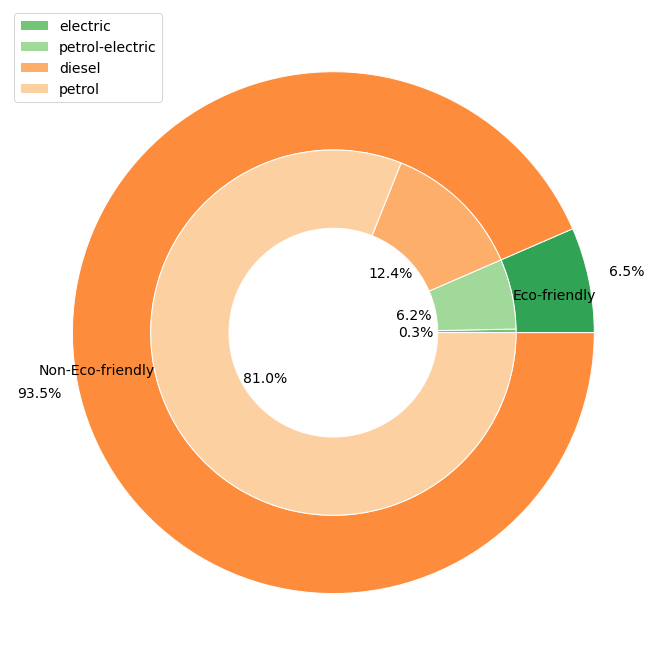

In [13]:
labels_outer = ['Eco-friendly', 'Non-Eco-friendly']
values_outer = [popularity_dict['electric'] + popularity_dict['petrol-electric'], popularity_dict['diesel'] + popularity_dict['petrol']]
labels_inner = list(popularity_dict.keys())
values_inner = list(popularity_dict.values())
cmap = plt.get_cmap("tab20c")
outer_colors = cmap([8, 5])
inner_colors = cmap([9,10,6,7])
fig, ax = plt.subplots(figsize=(24,12))
size = 0.3
ax.pie(values_outer, radius=1, colors=outer_colors, labels=labels_outer, labeldistance=0.7, autopct='%1.1f%%', pctdistance=1.15, wedgeprops=dict(width=size, edgecolor='w'), textprops={'fontsize': 14})
pie_wedges = ax.pie(values_inner, radius=1-size, colors=inner_colors, labels=labels_inner, labeldistance=None, autopct='%1.1f%%', pctdistance=0.45, wedgeprops=dict(width=size, edgecolor='w'), textprops={'fontsize': 14})
ax.set(aspect='equal'),
# plt.title('Pie plot showing Fuel Types as Eco-Friendly and Non-Eco-Friendly', fontdict = {'fontsize' : 15})
plt.legend(pie_wedges[0], labels_inner, fontsize=14, loc='upper left')
plt.show()

#### EDA on Pricing 
to see how much a of a gap exists

In [37]:
mean_price_across_fueltypes = []

In [38]:
electric_vehicles = df_task1_train.loc[df_task1_train['fuel_type']=='electric'] # .groupby(by='type_of_vehicle').agg('count')
print(len(electric_vehicles))
electric_vehicles = electric_vehicles.filter(['listing_id','type_of_vehicle', 'price'], axis=1)
electric_vehicles.groupby(by='type_of_vehicle').agg(['min', 'max', 'mean', 'count'])['price']

53


,min,max,mean,count
type_of_vehicle,,,,
hatchback,61600.0,193600.0,118634.782609,23
luxury sedan,252800.0,252800.0,252800.000000,1
mid-sized sedan,102300.0,106500.0,104400.000000,2
mpv,369600.0,369600.0,369600.000000,1
sports car,466200.0,665500.0,559371.428571,7
suv,132000.0,548900.0,292825.000000,8
van,96600.0,112000.0,102100.000000,11


In [39]:
## drop van since its not present in petrol-electric category
electric_vehicles.drop(electric_vehicles[(electric_vehicles['type_of_vehicle']=='van')].index, inplace=True)

In [40]:
prices_mean_electric = electric_vehicles.groupby(by='type_of_vehicle').agg('mean')['price'].values
print(prices_mean_electric, type(prices_mean_electric), prices_mean_electric.shape)
counts_electric = electric_vehicles.groupby(by='type_of_vehicle').agg('count')['listing_id'].values
print(counts_electric, type(counts_electric), counts_electric.shape)

# compute weighted average where the cmeount in each type_of_vehicle is the weight
w_avg_electric = np.average(prices_mean_electric, weights=counts_electric)
mean_price_across_fueltypes.append(w_avg_electric)

[118634.7826087  252800.         104400.         369600.
 559371.42857143 292825.        ] <class 'numpy.ndarray'> (6,)
[23  1  2  1  7  8] <class 'numpy.ndarray'> (6,)


In [41]:
petrol_electric_vehicles = df_task1_train.loc[df_task1_train['fuel_type']=='petrol-electric'] # .groupby(by='type_of_vehicle').agg('count')
print(len(petrol_electric_vehicles))
petrol_electric_vehicles = petrol_electric_vehicles.filter(['listing_id', 'type_of_vehicle', 'price'], axis=1)
petrol_electric_vehicles.groupby(by='type_of_vehicle').agg(['min', 'max', 'mean', 'count'])['price']

1041


,min,max,mean,count
type_of_vehicle,,,,
hatchback,15300.0,159400.0,81575.221239,113
luxury sedan,43800.0,610500.0,220566.995074,203
mid-sized sedan,10400.0,536800.0,91806.122449,49
mpv,32800.0,277200.0,117178.707224,263
sports car,180200.0,543200.0,323677.142857,35
stationwagon,63700.0,583000.0,100295.454545,66
suv,12700.0,531200.0,124748.076923,312


In [42]:
## drop stationwagon since it isn't present in electric category
petrol_electric_vehicles.drop(petrol_electric_vehicles[(petrol_electric_vehicles['type_of_vehicle']=='stationwagon')].index, inplace=True)

In [43]:
prices_mean_petrol_electric = petrol_electric_vehicles.groupby(by='type_of_vehicle').agg('mean')['price'].values
print(prices_mean_petrol_electric, type(prices_mean_petrol_electric), prices_mean_petrol_electric.shape)
counts_petrol_electric = petrol_electric_vehicles.groupby(by='type_of_vehicle').agg('count')['listing_id'].values
print(counts_petrol_electric, type(counts_petrol_electric), counts_petrol_electric.shape)
# compute weighted average where the count in each type_of_vehicle is the weight
w_avg_petrol_electric = np.average(prices_mean_petrol_electric, weights=counts_petrol_electric)
mean_price_across_fueltypes.append(w_avg_petrol_electric)

[ 81575.22123894 220566.99507389  91806.12244898 117178.70722433
 323677.14285714 124748.07692308] <class 'numpy.ndarray'> (6,)
[113 203  49 263  35 312] <class 'numpy.ndarray'> (6,)


In [44]:
mean_price_across_fueltypes

[233761.90476190476, 143138.15384615384]

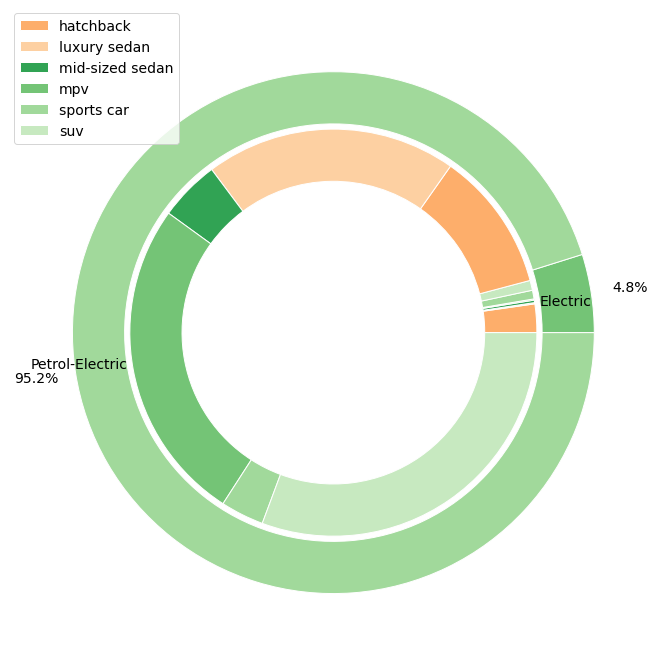

In [45]:
## Visualise pie chart to show split within eco-friendly fuel-types

labels_outer_eco = ['Electric', 'Petrol-Electric']

values_outer_eco = [popularity_dict['electric'], popularity_dict['petrol-electric']]
labels_inner_eco = sorted(list(electric_vehicles['type_of_vehicle'].unique())) + sorted(list(petrol_electric_vehicles['type_of_vehicle'].unique()))
values_inner_eco = list(electric_vehicles.groupby(by='type_of_vehicle').agg(['count'])['price']['count'].values) + list(petrol_electric_vehicles.groupby(by='type_of_vehicle').agg(['count'])['price']['count'].values)
cmap = plt.get_cmap("tab20c")
outer_colors_eco = cmap([9, 10])
inner_colors_eco = dict(zip(labels_inner_eco, cmap.colors[:len(labels_inner_eco)]))
fig, ax = plt.subplots(figsize=(24,12))
size = 0.2

ax.pie(values_outer_eco, radius=1, colors=outer_colors_eco, labels=labels_outer_eco, labeldistance=0.8, autopct='%1.1f%%', pctdistance=1.15, wedgeprops=dict(width=size, edgecolor='w'), textprops={'fontsize': 14})
pie_wedges_eco = ax.pie(values_inner_eco, radius=0.98-size, labels=labels_inner_eco, labeldistance=None, colors=[inner_colors_eco[key] for key in labels_inner_eco], wedgeprops=dict(width=size, edgecolor='w'))
ax.set(aspect='equal')
# plt.title('Pie plot showing Distribution within Eco-Friendly fuel-types', fontdict = {'fontsize' : 15})


plt.legend(pie_wedges_eco[0], list(inner_colors_eco.keys()), loc='upper left', fontsize=14)
plt.show()
# print(labels_outer_eco)
# print(values_outer_eco)
# print(labels_inner_eco)
# print(values_inner_eco)

In [46]:
diesel_vehicles = df_task1_train.loc[df_task1_train['fuel_type']=='diesel'] # .groupby(by='type_of_vehicle').agg('count')
print(len(diesel_vehicles))
diesel_vehicles = diesel_vehicles.filter(['listing_id', 'type_of_vehicle', 'price'], axis=1)
diesel_vehicles.groupby(by='type_of_vehicle').agg(['min', 'max', 'mean', 'count'])['price']

2088


,min,max,mean,count
type_of_vehicle,,,,
bus/mini bus,14100.0,175900.0,69188.679245,106
hatchback,40600.0,108700.0,77374.789916,119
luxury sedan,39400.0,500500.0,169711.594203,69
mid-sized sedan,41800.0,94300.0,62556.521739,23
mpv,39400.0,418000.0,82370.731707,123
sports car,170500.0,501400.0,294071.428571,7
stationwagon,59200.0,97700.0,82000.000000,7
suv,50400.0,646800.0,196064.000000,125
truck,10800.0,218800.0,63485.948158,733


In [47]:
## drop truck, bus/mini bus, van, stationwagon as these aren't present in all the others
diesel_vehicles.drop(diesel_vehicles[(diesel_vehicles['type_of_vehicle']=='truck') |
                                     (diesel_vehicles['type_of_vehicle']=='stationwagon') |
                                     (diesel_vehicles['type_of_vehicle']=='van') |
                                     (diesel_vehicles['type_of_vehicle']=='bus/mini bus')].index, inplace=True)

In [48]:
prices_mean_diesel = diesel_vehicles.groupby(by='type_of_vehicle').agg('mean')['price'].values
print(prices_mean_diesel, type(prices_mean_diesel), prices_mean_diesel.shape)
counts_diesel = diesel_vehicles.groupby(by='type_of_vehicle').agg('count')['listing_id'].values
print(counts_diesel, type(counts_diesel), counts_diesel.shape)
# compute weighted average where the count in each type_of_vehicle is the weight
w_avg_diesel = np.average(prices_mean_diesel, weights=counts_diesel)
mean_price_across_fueltypes.append(w_avg_diesel)

[ 77374.78991597 169711.5942029   62556.52173913  82370.73170732
 294071.42857143 196064.        ] <class 'numpy.ndarray'> (6,)
[119  69  23 123   7 125] <class 'numpy.ndarray'> (6,)


In [49]:
petrol_vehicles = df_task1_train.loc[df_task1_train['fuel_type']=='petrol'] # .groupby(by='type_of_vehicle').agg('count')
print(len(petrol_vehicles))
petrol_vehicles = petrol_vehicles.filter(['listing_id', 'type_of_vehicle', 'price'], axis=1)
petrol_vehicles.groupby(by='type_of_vehicle').agg(['min', 'max', 'mean', 'count'])['price']

13602


,min,max,mean,count
type_of_vehicle,,,,
bus/mini bus,84600.0,84600.0,84600.000000,1
hatchback,2100.0,236300.0,67759.440559,1573
luxury sedan,7200.0,2920500.0,130671.320890,2786
mid-sized sedan,4400.0,1045000.0,54034.765625,2560
mpv,3900.0,403700.0,75983.960948,1434
others,26000.0,548800.0,128621.428571,28
sports car,9700.0,2200000.0,231740.151899,1975
stationwagon,8200.0,448800.0,83837.275986,279
suv,6400.0,2076800.0,136322.264009,2659


In [50]:
## drop truck, bus/mini bus, van, stationwagon, others as these aren't present in all the others -- only for average pricing, SKIP WHEN GENERATING PIE CHARTS
petrol_vehicles.drop(petrol_vehicles[(petrol_vehicles['type_of_vehicle']=='truck') |
                                     (petrol_vehicles['type_of_vehicle']=='van') |
                                     (petrol_vehicles['type_of_vehicle']=='stationwagon') |
                                     (petrol_vehicles['type_of_vehicle']=='bus/mini bus') | 
                                     (petrol_vehicles['type_of_vehicle']=='others')].index, inplace=True)

In [51]:
prices_mean_petrol = petrol_vehicles.groupby(by='type_of_vehicle').agg('mean')['price'].values
print(prices_mean_petrol, type(prices_mean_petrol), prices_mean_petrol.shape)
counts_petrol = petrol_vehicles.groupby(by='type_of_vehicle').agg('count')['listing_id'].values
print(counts_petrol, type(counts_petrol), counts_petrol.shape)
# compute weighted average where the count in each type_of_vehicle is the weight
w_avg_petrol = np.average(prices_mean_petrol, weights=counts_petrol)
mean_price_across_fueltypes.append(w_avg_petrol)

[ 67759.44055944 130671.32089017  54034.765625    75983.9609484
 231740.15189873 136322.26400903] <class 'numpy.ndarray'> (6,)
[1573 2786 2560 1434 1975 2659] <class 'numpy.ndarray'> (6,)


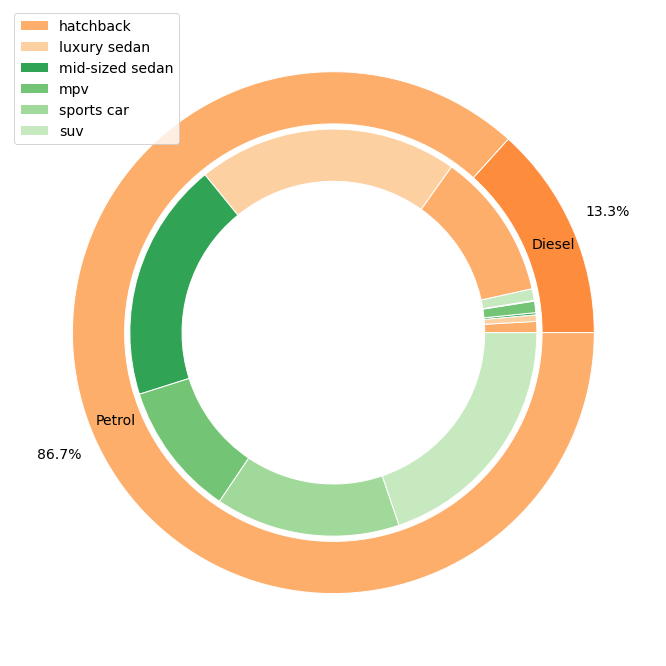

In [52]:
## Visualise pie chart to show split within non-eco-friendly fuel-types

labels_outer_noneco = ['Diesel', 'Petrol']

values_outer_noneco = [popularity_dict['diesel'], popularity_dict['petrol']]
labels_inner_noneco = sorted(list(diesel_vehicles['type_of_vehicle'].unique())) + sorted(list(petrol_vehicles['type_of_vehicle'].unique()))
values_inner_noneco = list(diesel_vehicles.groupby(by='type_of_vehicle').agg(['count'])['price']['count'].values) + list(petrol_vehicles.groupby(by='type_of_vehicle').agg(['count'])['price']['count'].values)
cmap = plt.get_cmap("tab20c")
outer_colors_noneco = cmap([5, 6])
inner_colors_noneco = dict(zip(labels_inner_noneco, cmap.colors[:len(labels_inner_noneco)]))

fig, ax = plt.subplots(figsize=(24,12))
size = 0.2
ax.pie(values_outer_noneco, radius=1, colors=outer_colors_noneco, labels=labels_outer_noneco, labeldistance=0.83,  autopct='%1.1f%%', pctdistance=1.15, wedgeprops=dict(width=size, edgecolor='w'), textprops={'fontsize': 14})
# ax.pie(values_outer_noneco, radius=1, colors=outer_colors_noneco, wedgeprops=dict(width=size, edgecolor='w'))
# ax.pie(values_inner_noneco, radius=1-size, colors=inner_colors_noneco, labels=labels_inner_noneco, labeldistance=0.7, wedgeprops=dict(width=size, edgecolor='w'), textprops={'fontsize': 14})
pie_wedges_noneco = ax.pie(values_inner_noneco, radius=0.98-size, labels=labels_inner_noneco, labeldistance=None, colors=[inner_colors_noneco[key] for key in labels_inner_noneco], wedgeprops=dict(width=size, edgecolor='w'))
ax.set(aspect='equal')
# plt.title('Pie plot showing Distribution within Non-Eco-Friendly fuel-types', fontdict = {'fontsize' : 15})

plt.legend(pie_wedges_noneco[0], list(inner_colors_noneco.keys()), loc='upper left', fontsize=14)

plt.show()

# print(labels_outer_noneco)
# print(values_outer_noneco)
# print(labels_inner_noneco)
# print(values_inner_noneco)

In [53]:
mean_price_across_fueltypes

[233761.90476190476,
 143138.15384615384,
 126726.60944206009,
 118433.32563332563]

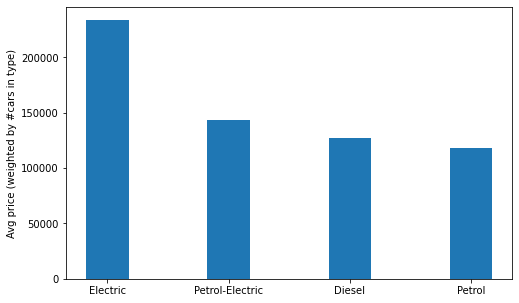

In [54]:
## plot the weighted averaged prices across fuel_types
N = len(mean_price_across_fueltypes)
ind = np.arange(N)
width = 0.35
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(ind, mean_price_across_fueltypes, width)
ax.set_ylabel('Avg price (weighted by #cars in type)')
ax.set_xticks(ind)
ax.set_xticklabels(('Electric', 'Petrol-Electric', 'Diesel', 'Petrol'))
# plt.title('Weighted Avg Price across the fuel-types', fontdict={'fontsize': 15}) 
plt.show()
